In [1]:
# --- Install dependencies ---
!pip install pandas scikit-learn openpyxl

import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# --- Upload dataset ---
uploaded = files.upload()
filename = list(uploaded.keys())[0]   # get uploaded filename

# --- Load dataset ---
# --- Load dataset with explicit engine specification ---
df = pd.read_excel(filename, engine='openpyxl')

# --- Preprocessing and further operations continue as usual ---


# --- Preprocessing ---
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Updated feature columns (including file_approved and overtime_approved)
feature_cols = ['user_id', 'action', 'hour', 'day_of_week',
                'file_size', 'application', 'command',
                'privilege_level', 'overtime_approved', 'file_approved']

data = df[feature_cols].copy()

# Encode categorical columns
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Fill missing values
data = data.fillna(0)

# --- Train Isolation Forest ---
iso = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_raw'] = iso.fit_predict(data)
df['anomaly_score'] = iso.decision_function(data)

# Map results: -1 = Suspicious, 1 = Normal
df['anomaly'] = df['anomaly_raw'].map({1: "Normal", -1: "Suspicious"})

# --- Show suspicious logs with highest anomaly scores ---
suspicious_logs = df[df['anomaly'] == "Suspicious"].sort_values(by='anomaly_score')
suspicious_logs.head(20)


Saving insider_threat_logs_50k_updated.xlsx to insider_threat_logs_50k_updated (1).xlsx


,log_id,user_id,department,action,timestamp,source_ip,device_id,file_name,file_size,application,...,resource_branch,branch_approved,overtime_approved,days_worked,file_approved,hour,day_of_week,anomaly_raw,anomaly_score,anomaly
28420,452c379a-12e8-421a-8710-1826d3214e65,user109,Sales,privilege_escalation,2024-03-24 22:08:40.418925+00:00,192.168.1.1,laptop-457,project_code.zip,443.0,DevOps_app.exe,...,IT,0,0,106,1,22,6,-1,-0.063170,Suspicious
21153,12639125-529d-49d0-98a7-58c69c2cab62,user89,HR,privilege_escalation,2023-09-18 08:33:39.930592+00:00,192.168.1.87,laptop-477,salary_data.xlsx,454.0,NaN,...,IT,0,0,1954,1,8,0,-1,-0.053793,Suspicious
29404,bc772bcf-f846-474b-9baf-d72057d0aa00,user118,Engineering,privilege_escalation,2024-02-05 20:35:40.458152+00:00,192.168.1.71,laptop-619,project_code.zip,494.0,CRM_portal.exe,...,Engineering,1,1,339,1,20,0,-1,-0.050002,Suspicious
27066,5b8c5a9c-5a93-401e-b1b9-fe9ff8dfdb33,user87,Finance,privilege_escalation,2025-08-04 19:40:40.319015+00:00,192.168.1.81,laptop-188,confidential.pdf,474.0,CRM_portal.exe,...,HR,0,0,113,1,19,0,-1,-0.048413,Suspicious
17553,8e4aae75-ea96-418e-8dd4-94d3e0bb9ade,user92,Sales,file_download,2025-06-08 05:24:39.711265+00:00,192.168.1.70,laptop-96,presentation.pptx,62.0,NaN,...,Engineering,0,0,263,0,5,6,-1,-0.047357,Suspicious
47553,8e4aae75-ea96-418e-8dd4-94d3e0bb9ade,user92,Sales,file_download,2025-06-08 05:24:39.711265+00:00,192.168.1.70,laptop-96,presentation.pptx,62.0,NaN,...,Engineering,0,0,263,0,5,6,-1,-0.047357,Suspicious
49819,847f2995-3b78-4deb-b44b-4f8b3bb9ad62,user141,HR,privilege_escalation,2023-10-23 17:59:39.842384+00:00,192.168.1.117,laptop-69,salary_data.xlsx,487.0,CRM_portal.exe,...,Sales,0,0,1930,1,17,0,-1,-0.047345,Suspicious
19819,847f2995-3b78-4deb-b44b-4f8b3bb9ad62,user141,HR,privilege_escalation,2023-10-23 17:59:39.842384+00:00,192.168.1.117,laptop-69,salary_data.xlsx,487.0,CRM_portal.exe,...,Sales,0,0,1930,1,17,0,-1,-0.047345,Suspicious
27305,fe796da2-39c2-4d08-b258-73489e54c2f8,user101,HR,file_download,2024-08-11 00:31:40.326877+00:00,192.168.1.88,laptop-680,salary_data.xlsx,221.0,CRM_portal.exe,...,Engineering,0,0,9,1,0,6,-1,-0.045226,Suspicious
28516,01d87290-d6fc-4d8b-a853-f3142c2f5f6c,user108,IT,logout,2025-05-14 18:23:40.422702+00:00,192.168.1.43,laptop-445,confidential.pdf,500.0,CRM_portal.exe,...,Engineering,0,0,235,1,18,2,-1,-0.044281,Suspicious


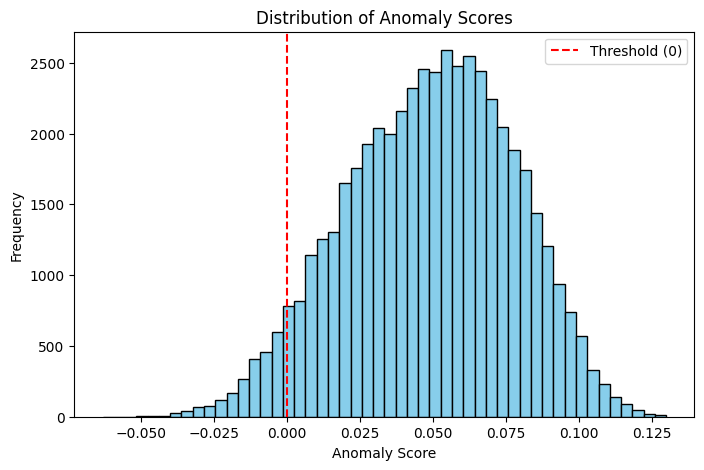

In [2]:
import matplotlib.pyplot as plt

# Plot histogram of anomaly scores
plt.figure(figsize=(8,5))
plt.hist(df["anomaly_score"], bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label="Threshold (0)")
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

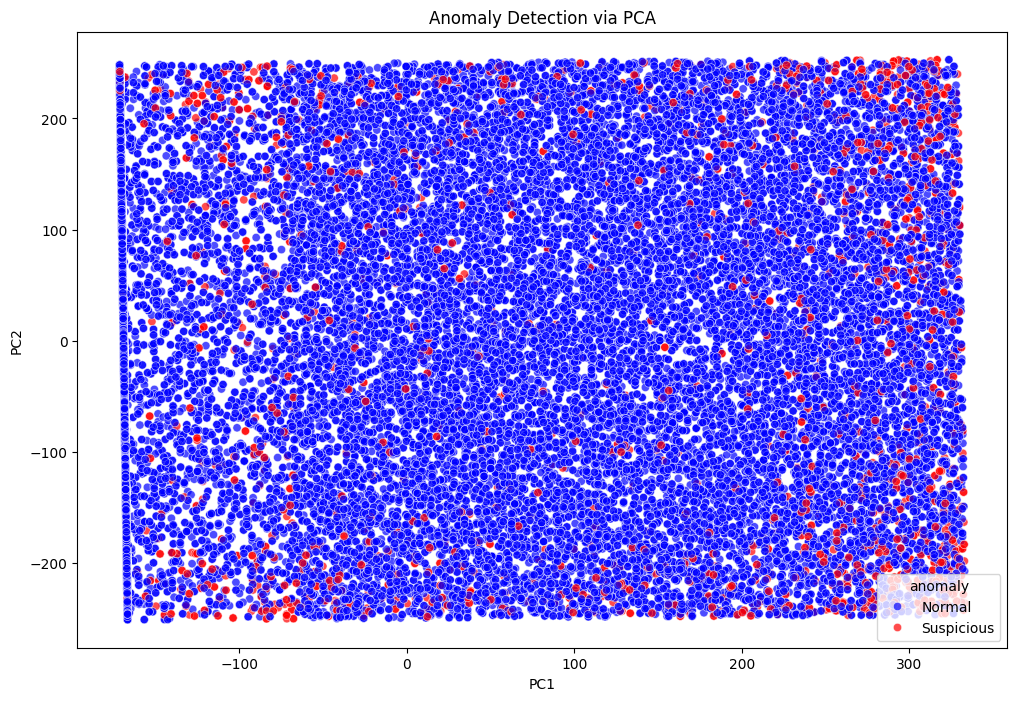

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['anomaly'] = df['anomaly']

# Plot the results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='anomaly', data=df_pca, palette={'Normal': 'blue', 'Suspicious': 'red'}, alpha=0.7)
plt.title('Anomaly Detection via PCA')
plt.show()

/tmp/ipython-input-3308015747.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=normal_df['PC1'], y=normal_df['PC2'], cmap="Blues", shade=True, thresh=0.05)


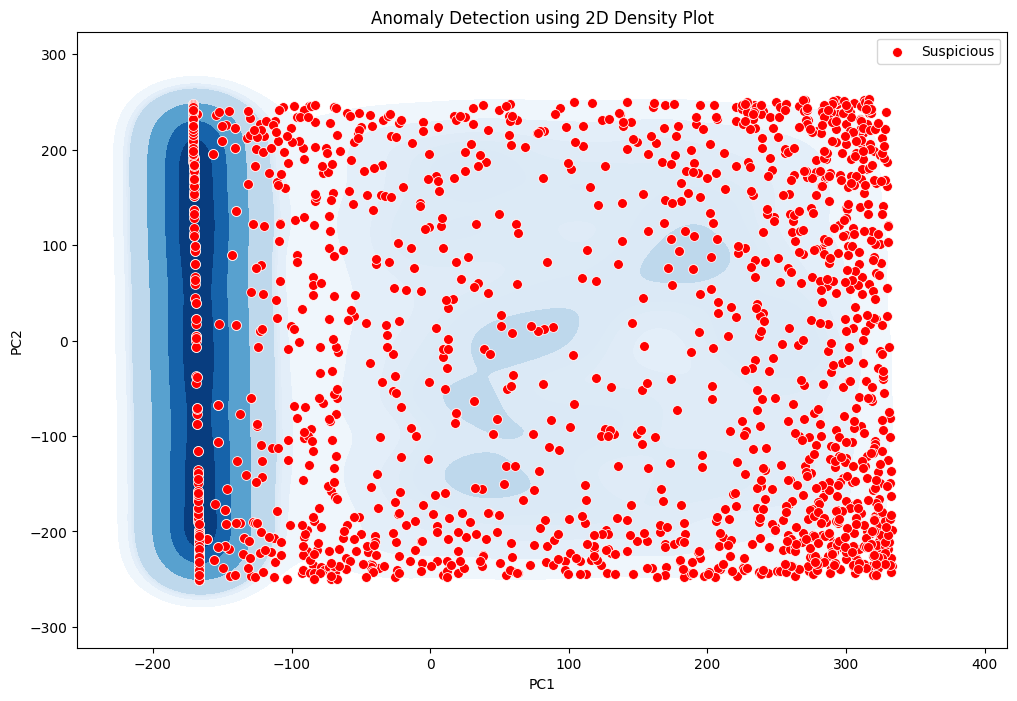

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df_pca' is your DataFrame

# Separate your normal and suspicious points
suspicious_df = df_pca[df_pca['anomaly'] == 'Suspicious']
normal_df = df_pca[df_pca['anomaly'] == 'Normal']

plt.figure(figsize=(12, 8))

# Create a 2D density plot for the normal data
sns.kdeplot(x=normal_df['PC1'], y=normal_df['PC2'], cmap="Blues", shade=True, thresh=0.05)

# Overlay the suspicious points
sns.scatterplot(x=suspicious_df['PC1'], y=suspicious_df['PC2'], color='red', s=50, label='Suspicious')

plt.title('Anomaly Detection using 2D Density Plot')
plt.legend()
plt.show()

In [15]:
def classify_event_by_final_rules(row):
    """
    Classifies a log entry using a comprehensive set of context-aware rules.
    """
    # Create 'hour' on the fly for the check
    hour = pd.to_datetime(row['timestamp']).hour

    # Rule 1: Dangerous commands are always a high-priority alert.
    dangerous_commands = ['chmod 777 /var/log', 'rm -rf /tmp/*']
    if row.get('command') in dangerous_commands:
        return "Suspicious (Dangerous Command)"

    # Rule 2 (NEW): Unusually large file sizes are a sign of data exfiltration.

    if  row.get('file_size', 0) > 350:
        return "Suspicious (Large File Size - Unapproved)"



    # Rule 3 (IMPROVED): Flag high-privilege actions ONLY if overtime is NOT approved.
    is_overtime = (hour < 9 or hour > 18)
    high_privilege = (row.get('privilege_level') in ['admin', 'superuser'])
    if is_overtime and high_privilege and row.get('overtime_approved') == 0:
        return "Suspicious (Unapproved Overtime)"

    # Rule 4 (IMPROVED): Flag sensitive file access by non-HR, but make an exception for new admins.
    sensitive_files = ['salary_data.xlsx', 'confidential.pdf']
    is_newly_promoted = row.get('days_worked', 999) < 30
    if row.get('file_name') in sensitive_files and row.get('user_branch') != 'HR' and not is_newly_promoted:
        return "Suspicious (Sensitive File Access)"

    # Rule 5: Cross-branch access by a non-admin is suspicious.
    if row.get('user_branch') != row.get('resource_branch') and row.get('privilege_level') != 'admin':
         return "Suspicious (Branch Crossover)"

    # If no suspicious rules are met, the event is normal
    return "Normal"

# Apply the function and add the final classification
df['final_classification'] = df.apply(classify_event_by_final_rules, axis=1)

# Show suspicious events
suspicious_df = df[df['final_classification'] != 'Normal']
suspicious_df[['timestamp', 'user_id', 'file_size', 'user_branch', 'resource_branch', 'final_classification']].head(20)


,timestamp,user_id,file_size,user_branch,resource_branch,final_classification
0,2024-12-02 06:51:38.226960+00:00,user303,NaN,Finance,Sales,Suspicious (Sensitive File Access)
1,2024-04-15 18:09:38.227145+00:00,user209,475.0,HR,Engineering,Suspicious (Dangerous Command)
2,2025-07-23 10:18:38.227261+00:00,user331,212.0,Engineering,Engineering,Suspicious (Dangerous Command)
3,2024-01-14 13:15:38.227413+00:00,user125,NaN,Engineering,IT,Suspicious (Sensitive File Access)
4,2024-11-21 23:56:38.227756+00:00,user250,467.0,Engineering,HR,Suspicious (Large File Size - Unapproved)
5,2024-12-07 21:31:38.227960+00:00,user447,NaN,IT,Sales,Suspicious (Sensitive File Access)
6,2024-06-08 10:32:38.228140+00:00,user489,NaN,HR,IT,Suspicious (Dangerous Command)
7,2024-12-30 07:40:38.228531+00:00,user128,391.0,Sales,HR,Suspicious (Large File Size - Unapproved)
8,2024-12-18 14:05:38.228856+00:00,user107,223.0,IT,HR,Suspicious (Sensitive File Access)
9,2023-12-27 00:54:38.229046+00:00,user378,331.0,Sales,IT,Suspicious (Dangerous Command)
